# GradedLab 1 
## Task 3: Apply Q-Learning

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
from typing import NamedTuple
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [3]:
class Params(NamedTuple):
    total_episodes: int 
    map_size: int
    seed: int
    is_slippery: bool
    proba_frozen: float
    gamma: float
    epsilon: float
    learning_rate: float

In [4]:
# Plots
def plot_trajectory_lengths(trajectory_lengths):
    plt.figure(figsize=(10, 5))
    plt.plot(trajectory_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Trajectory Length (Steps)")
    plt.title("Length of Trajectories per Episode")
    plt.show()

def plot_learning_curve(episode_returns):
    plt.figure(figsize=(10, 5))
    cumulative_returns = np.cumsum(episode_returns)
    plt.plot(cumulative_returns)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Reward")
    plt.title("Learning Curve (Cumulative Reward over Episodes)")
    plt.show()

def plot_value_function(Q, params: Params):
    size = params.map_size
    values = np.zeros((size, size))
    for state in range(size * size):
        row, col = divmod(state, size)
        values[row, col] = np.max(Q[state])  # Maximum Q-value for each state

    plt.figure(figsize=(7, 6))
    plt.imshow(values, cmap='viridis', interpolation='nearest') 
    plt.colorbar(label="State-Value (V) from Q-learning")
    plt.title("State-Value Function (Q-learning)")
    plt.xlabel("State (Columns)")
    plt.ylabel("State (Rows)")
    
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{values[i, j]:.2f}", ha='center', va='center', color="white" if values[i, j] < 0.3 else "black")
    
    plt.show()

In [5]:
def q_learning(params: Params):
    random_map = generate_random_map(size=params.map_size, p=params.proba_frozen)
    env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=params.is_slippery)
    env.reset(seed=params.seed)

    # Initialize Q-table with zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    episode_lengths = []
    episode_returns = []

    for episode in range(params.total_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done:
            if np.random.rand() < params.epsilon:
                action = env.action_space.sample()  
            else:
                max_value = np.max(Q[state])
                max_actions = [action for action, value in enumerate(Q[state]) if value == max_value]
                action = np.random.choice(max_actions)

            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + params.gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += params.learning_rate * td_error

            state = next_state  
            steps += 1

        episode_lengths.append(steps)
        episode_returns.append(total_reward)

    return Q, episode_lengths, episode_returns

### 5x5 configuration

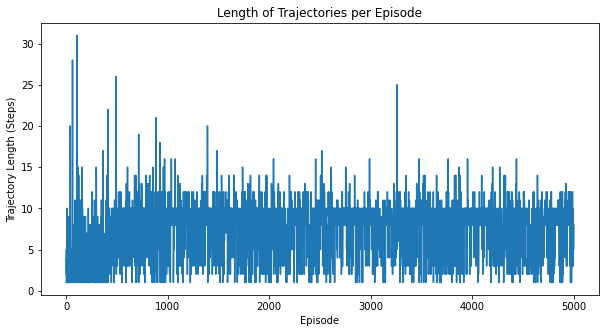

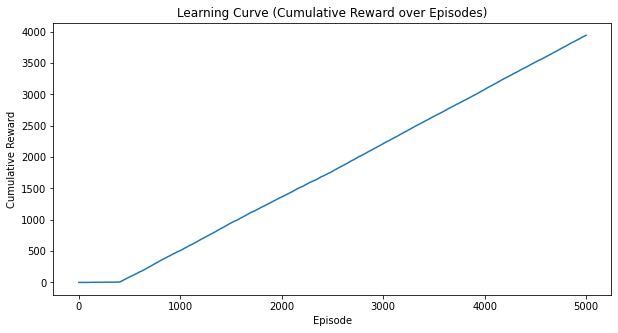

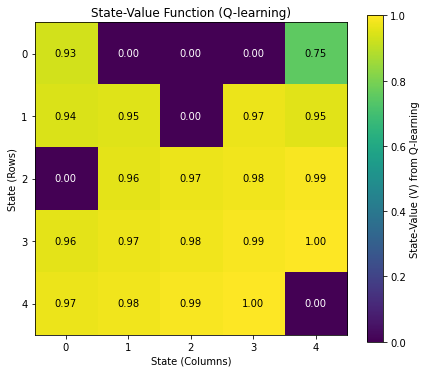

In [11]:
params_5x5 = Params(total_episodes=5000, map_size=5, seed=123, is_slippery=False, proba_frozen=0.9, gamma=0.99, epsilon=0.1, learning_rate=0.8)
Q_5x5, trajectory_lengths_5x5, episode_returns_5x5 = q_learning(params_5x5)

plot_trajectory_lengths(trajectory_lengths_5x5)
plot_learning_curve(episode_returns_5x5)
plot_value_function(Q_5x5, params_5x5)

### 11x11 configuration

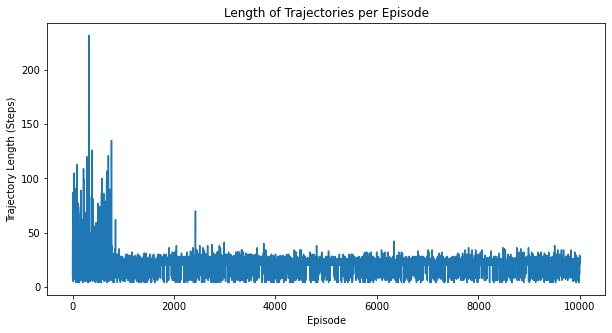

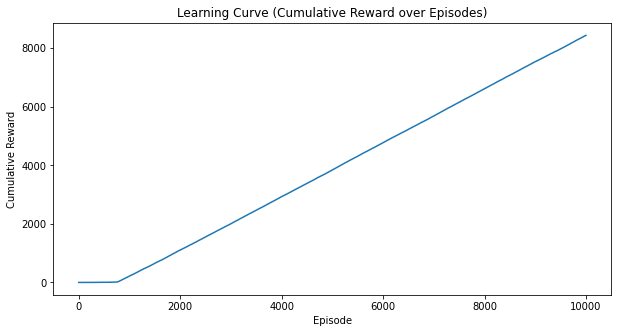

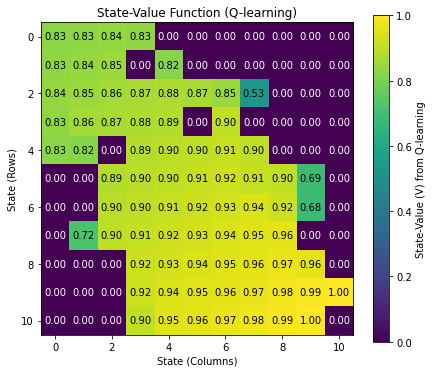

In [16]:
params_11x11 = Params(total_episodes=10000, map_size=11, seed=123, is_slippery=False, proba_frozen=0.9, gamma=0.99, epsilon=0.1, learning_rate=0.8)
Q_11x11, trajectory_lengths_11x11, episode_returns_11x11 = q_learning(params_11x11)

plot_trajectory_lengths(trajectory_lengths_11x11)
plot_learning_curve(episode_returns_11x11)
plot_value_function(Q_11x11, params_11x11)